# Milestone 2: Additional Extraction, Transform, and Load (ETL) + Exploratory Data Analysis (EDA), and Model Proposal

## NBA Shot Selection Analysis: Who is actually clutch?

**By JoQuise Bridges**

This write up will walk you through the datasets that I am considering working with and why.

**My Webpage:** [bjoquise's Github](https://github.com/users/bjoquise/projects/1/views/1) 

**My Github Page:** [bjoquise.github.io](https://bjoquise.github.io)

## Setup and Imports

I learned the hard way to remember to install the correct items and packages for this to all work correctly. So saving some time: 



In [1]:
!pip3 install lxml
!pip3 install html5lib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 19.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 3.7 MB/s eta 0:00:00


The magic making it all come together:



In [2]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [3]:
%cd /home/jovyan/notebooks/cmps6790/_labs/

/home/jovyan/notebooks/cmps6790/_labs


In [4]:
!ls

data	Lab01  Lab03  Lab05  Lab08  Lab10  Lab12  old
images	Lab02  Lab04  Lab06  Lab09  Lab11  Lab13  README.md


## Dataset - NBA Shot Selection

This [dataset](https://www.kaggle.com/datasets/mexwell/nba-shots?resource=download) (or set of datasets) made my eyes wide because I felt that the possiblities were endless! It is a collection of NBA regular season shot location data from the 03-04 season to 23-24.

This one required a bit more work to create the data to be presented in a tidy data instance.

Some ideas I had for analysis included:

1. What is the average shooting accuracy across the different zones on the court?

2. What is the distribution of shot distance?

3. How does one player improve throughout their career?*

First, I had to take the separate csv files to combine into one DataFrame:

In [5]:
list_of_frames = []
# Using glob from Lab 6
all_year_shots = glob.glob("data/shots/*.csv")
for datafile in all_year_shots:
# Had to find a way to get the year from all of the files so it can be in the main, big dataframe
    year = int(datafile.split('NBA_')[1].split('_Shots.csv')[0])
    shots_df = pd.read_csv(datafile)
    shots_df["Year"] = year
    list_of_frames.append(shots_df)
    
all_shots_df = pd.concat(list_of_frames, 
                   ignore_index=True)
all_shots_df.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,Year
0,2009,2008-09,1610612744,Golden State Warriors,201627,Anthony Morrow,G,SG,04-15-2009,20801229,...,Center,C,Less Than 8 ft.,-0.0,5.25,0,4,0,1,2009
1,2009,2008-09,1610612744,Golden State Warriors,101235,Kelenna Azubuike,F,SF,04-15-2009,20801229,...,Center,C,Less Than 8 ft.,-0.0,5.25,0,4,0,9,2009
2,2009,2008-09,1610612756,Phoenix Suns,255,Grant Hill,F,SF,04-15-2009,20801229,...,Center,C,Less Than 8 ft.,-0.0,5.25,0,4,0,25,2009
3,2009,2008-09,1610612739,Cleveland Cavaliers,200789,Daniel Gibson,G,PG,04-15-2009,20801219,...,Center,C,Less Than 8 ft.,-0.2,5.25,0,5,0,4,2009
4,2009,2008-09,1610612756,Phoenix Suns,255,Grant Hill,F,SF,04-15-2009,20801229,...,Left Side,L,8-16 ft.,8.7,7.55,8,4,1,3,2009


### Tidying

As Always, I began to drop the variables I felt were not needed for what I was analyzing.

I chose to keep the `Team_ID`, for the teams that have changed their names, but are essentially the same team...looking at you New Orleans.

I dropped the `SEASON_1` and `SEASON_2` since I already did the work to put the year as a variable.

I dropped `POSITION_GROUP`, `ZONE_ABB`, `ZONE_RANGE`, since I felt they were accounted for within the dataset.

I chose to keep a lot of the variables because of the countless relationships I could compare and make connections out of but as time goes on, I may drop more.

I wanted to convert the data types to make sure that they are correct.

In [6]:
nba_df = all_shots_df.drop(columns=['SEASON_1', 'SEASON_2', 'POSITION_GROUP', 'ZONE_ABB', 'ZONE_RANGE'])
nba_df['GAME_DATE'] = pd.to_datetime(nba_df['GAME_DATE'])

nba_df.head()

,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION,GAME_DATE,GAME_ID,HOME_TEAM,AWAY_TEAM,EVENT_TYPE,...,SHOT_TYPE,BASIC_ZONE,ZONE_NAME,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,Year
0,1610612744,Golden State Warriors,201627,Anthony Morrow,SG,2009-04-15,20801229,PHX,GSW,Made Shot,...,2PT Field Goal,Restricted Area,Center,-0.0,5.25,0,4,0,1,2009
1,1610612744,Golden State Warriors,101235,Kelenna Azubuike,SF,2009-04-15,20801229,PHX,GSW,Missed Shot,...,2PT Field Goal,Restricted Area,Center,-0.0,5.25,0,4,0,9,2009
2,1610612756,Phoenix Suns,255,Grant Hill,SF,2009-04-15,20801229,PHX,GSW,Made Shot,...,2PT Field Goal,Restricted Area,Center,-0.0,5.25,0,4,0,25,2009
3,1610612739,Cleveland Cavaliers,200789,Daniel Gibson,PG,2009-04-15,20801219,CLE,PHI,Made Shot,...,2PT Field Goal,Restricted Area,Center,-0.2,5.25,0,5,0,4,2009
4,1610612756,Phoenix Suns,255,Grant Hill,SF,2009-04-15,20801229,PHX,GSW,Missed Shot,...,2PT Field Goal,Mid-Range,Left Side,8.7,7.55,8,4,1,3,2009


Wanted to verify that the `SHOT_MADE` was a boolean value.
Also, wanted the year to be not the last column read.




In [7]:
nba_df['SHOT_MADE'] = nba_df['SHOT_MADE'].astype(bool)

**Example Analysis 1:** 

Does the shooting accuracy decline as the game progresses?


In [8]:
quarter_accuracy = nba_df.groupby('QUARTER')['SHOT_MADE'].mean()
print(quarter_accuracy)

QUARTER
1    0.467157
2    0.460422
3    0.457715
4    0.445597
5    0.414879
6    0.407710
7    0.402154
8    0.452055
Name: SHOT_MADE, dtype: float64


This could be interpreted as the accuracy does decline over the game, probably due to them getting tired.

**Example Analysis 2:** 

Which zones have the highest shooting accuracy? I would guess the center


In [9]:
zone_accuracy = nba_df.groupby('ZONE_NAME')['SHOT_MADE'].mean()
print(zone_accuracy)

ZONE_NAME
Back Court           0.027129
Center               0.524424
Left Side            0.392638
Left Side Center     0.367183
Right Side           0.394322
Right Side Center    0.369486
Name: SHOT_MADE, dtype: float64


**Example Analysis 3:** 

What is the average shooting accuracy across the different zones on the court?


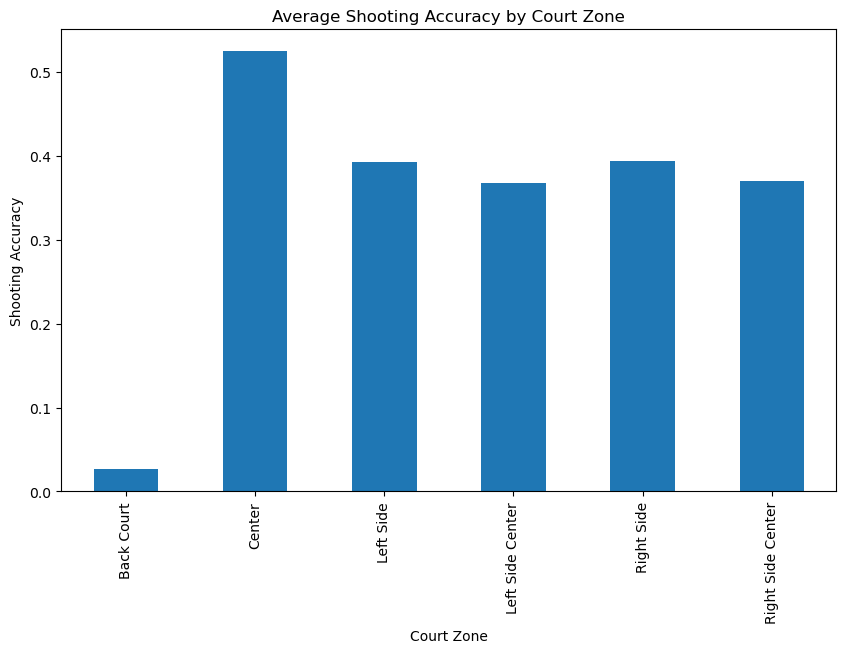

In [10]:
zone_accuracy = nba_df.groupby('ZONE_NAME')['SHOT_MADE'].mean()

plt.figure(figsize=(10,6))
zone_accuracy.plot(kind='bar')
plt.title('Average Shooting Accuracy by Court Zone')
plt.xlabel('Court Zone')
plt.ylabel('Shooting Accuracy')
plt.show()

**Another Example Analysis:** 

I was not satisfied with that bar chart so I figured I dove a bit deeper into this one since we had more variables at play.

"How does one player improve throughout their career?"

When I initally asked this, I was thinking of tracking a player's makes/misses over their career. But the more I thought about it, what if I wanted to track a player's specific shot over every season.

I used [this](https://www.mathworks.com/help/matlab/ref/plot.html?searchHighlight=line%20graph&s_tid=srchtitle_support_results_1_line%20graph) a bit for help

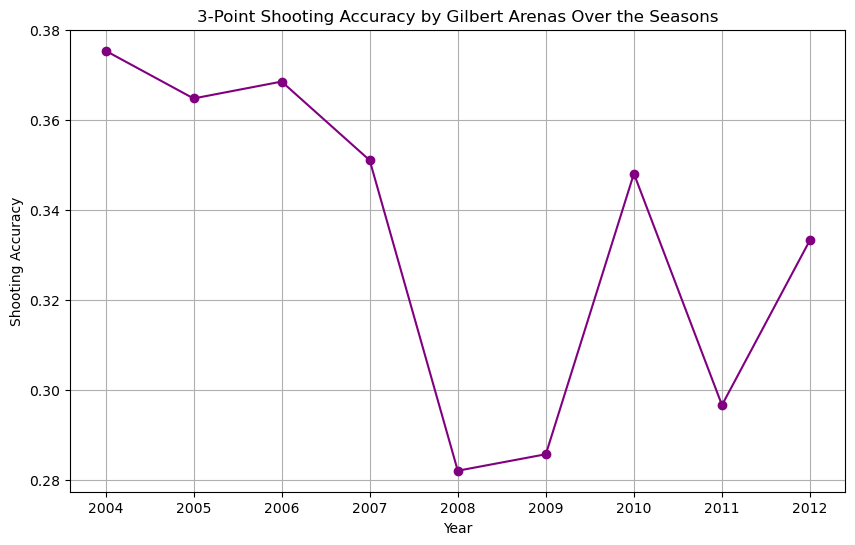

In [11]:
#Filter the data
three_point_shots_df = nba_df[nba_df['SHOT_TYPE'] == '3PT Field Goal']
player_name = 'Gilbert Arenas' 
player_shots_df = three_point_shots_df[three_point_shots_df['PLAYER_NAME'] == player_name]

player_accuracy_by_year = player_shots_df.groupby('Year')['SHOT_MADE'].mean()

plt.figure(figsize=(10,6))
player_accuracy_by_year.plot(kind='line', marker='o', color='purple')
plt.title(f'3-Point Shooting Accuracy by {player_name} Over the Seasons')
plt.xlabel('Year')
plt.ylabel('Shooting Accuracy')
plt.grid(True)

plt.show()

**Interesting Stat:** Using background knowledge, I know that Gilbert Arenas was drafted in 2001, so a negative part of the data is that I am not getting his entire career, but it is striking that he won NBA Easten Conference Player of the week, from [Wikipedia](https://en.wikipedia.org/wiki/Gilbert_Arenas#Awards_and_honors) only 7 times in his career and that is through the 2004-2006-07 run and the `Shooting Accuracy` shows he was on a great run with the 3-Pointers.

Just for fun, let's see the magificent Stephen Curry:

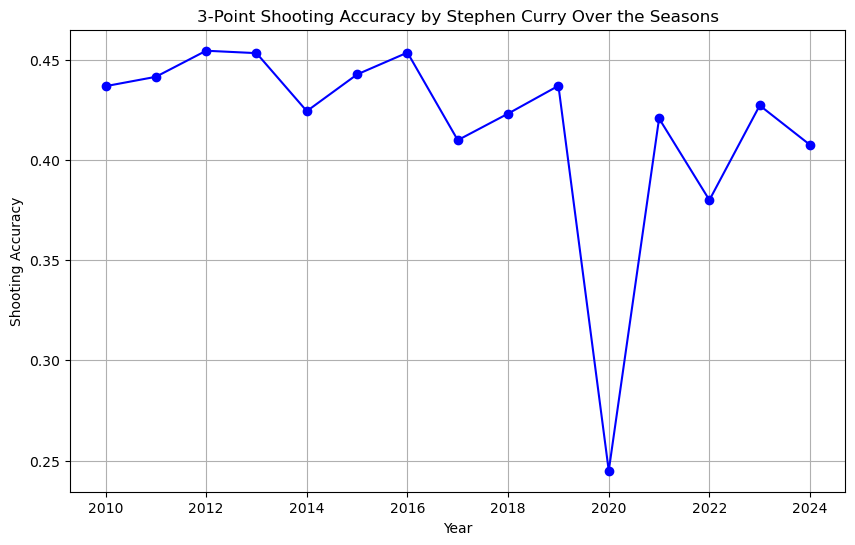

In [12]:
three_point_shots_df = nba_df[nba_df['SHOT_TYPE'] == '3PT Field Goal']
player_name = 'Stephen Curry' 
player_shots_df = three_point_shots_df[three_point_shots_df['PLAYER_NAME'] == player_name]

player_accuracy_by_year = player_shots_df.groupby('Year')['SHOT_MADE'].mean()

plt.figure(figsize=(10,6))
player_accuracy_by_year.plot(kind='line', marker='o', color='blue')
plt.title(f'3-Point Shooting Accuracy by {player_name} Over the Seasons')
plt.xlabel('Year')
plt.ylabel('Shooting Accuracy')
plt.grid(True)

plt.show()

Clearly, the stats show that he had several injuries within 2020. It is a lot of different factors at play as well but he continued to push and still got his accuracy back to his legendary 2016-2018 run.

# Milestone 2: Additional Extraction, Transform, and Load (ETL) + Exploratory Data Analysis (EDA), and Model Proposal

Since I combined so many datasets to create this one with several years, I think I should treat it like SQL and create multiple datasets with different primary and foreign keys.

In [13]:
nba_df.columns

Index(['TEAM_ID', 'TEAM_NAME', 'PLAYER_ID', 'PLAYER_NAME', 'POSITION',
       'GAME_DATE', 'GAME_ID', 'HOME_TEAM', 'AWAY_TEAM', 'EVENT_TYPE',
       'SHOT_MADE', 'ACTION_TYPE', 'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME',
       'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT',
       'Year'],
      dtype='object')

I chose to make 4 different dataframes so it can be far more tidy and easier to follow:

1) `teams_df` where the columns will be `TEAM_ID` and `TEAM_NAME` and the primary key will be obviously `TEAM_ID`.
2) `players_df` where the columns will be `PLAYER_ID`, `PLAYER_NAME`, and `POSITION` and the primary key will be `PLAYER_ID` 
3) `games_df` where the columns will be `GAME_ID`, `GAME_DATE`, `HOME_TEAM`, and `AWAY_TEAM`. The primary key wil;l be `GAME_ID` and the foreign keys will be `HOME_TEAM` and `AWAY_TEAM`.
4) `shots_df` will be the most columns since there is a bit of information, I will probably need to tidy it up but for now, the columns are `GAME_ID`, `PLAYER_ID`, `TEAM_ID`, `SHOT_MADE`, `ACTION_TYPE`, `SHOT_TYPE`, `BASIC_ZONE`, `ZONE_NAME`, `LOC_X`, `LOC_Y`, `SHOT_DISTANCE`, `QUARTER`, `MINS_LEFT`, `SECS_LEFT`, and `EVENT_TYPE`. Obviously the first three are the foreign keys.

In [14]:
teams_df = nba_df[['TEAM_ID', 'TEAM_NAME']].drop_duplicates().reset_index(drop=True)

In [15]:
players_df = nba_df[['PLAYER_ID', 'PLAYER_NAME', 'POSITION']].drop_duplicates().reset_index(drop=True)

In [16]:
games_df = nba_df[['GAME_ID', 'GAME_DATE', 'HOME_TEAM', 'AWAY_TEAM']].drop_duplicates().reset_index(drop=True)

In [17]:
shots_df = nba_df[['GAME_ID', 'PLAYER_ID', 'TEAM_ID', 'SHOT_MADE', 'ACTION_TYPE','SHOT_TYPE', 'BASIC_ZONE', 
                   'ZONE_NAME', 'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT', 
                   'EVENT_TYPE']].copy()

In [18]:
teams_df.head()

,TEAM_ID,TEAM_NAME
0,1610612744,Golden State Warriors
1,1610612756,Phoenix Suns
2,1610612739,Cleveland Cavaliers
3,1610612755,Philadelphia 76ers
4,1610612765,Detroit Pistons


In [19]:
players_df.head()

,PLAYER_ID,PLAYER_NAME,POSITION
0,201627,Anthony Morrow,SG
1,101235,Kelenna Azubuike,SF
2,255,Grant Hill,SF
3,200789,Daniel Gibson,PG
4,201228,C.J. Watson,PG


In [20]:
games_df.head()

,GAME_ID,GAME_DATE,HOME_TEAM,AWAY_TEAM
0,20801229,2009-04-15,PHX,GSW
1,20801219,2009-04-15,CLE,PHI
2,20801223,2009-04-15,MIA,DET
3,20801217,2009-04-15,BOS,WAS
4,20801221,2009-04-15,IND,MIL


In [21]:
shots_df.head()

,GAME_ID,PLAYER_ID,TEAM_ID,SHOT_MADE,ACTION_TYPE,SHOT_TYPE,BASIC_ZONE,ZONE_NAME,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,EVENT_TYPE
0,20801229,201627,1610612744,True,Driving Layup Shot,2PT Field Goal,Restricted Area,Center,-0.0,5.25,0,4,0,1,Made Shot
1,20801229,101235,1610612744,False,Layup Shot,2PT Field Goal,Restricted Area,Center,-0.0,5.25,0,4,0,9,Missed Shot
2,20801229,255,1610612756,True,Layup Shot,2PT Field Goal,Restricted Area,Center,-0.0,5.25,0,4,0,25,Made Shot
3,20801219,200789,1610612739,True,Driving Layup Shot,2PT Field Goal,Restricted Area,Center,-0.2,5.25,0,5,0,4,Made Shot
4,20801229,255,1610612756,False,Jump Shot,2PT Field Goal,Mid-Range,Left Side,8.7,7.55,8,4,1,3,Missed Shot


After splitting into 4 data frames, it was much easier to manage and seek out mistakes and value inconsistencies. The first that was sticking out to me was the difference in formats for `TEAM_NAME` vs `HOME_TEAM` and `AWAY_TEAM`. I had to find a way to merge the columns to create the correlation between those variables.  This proved to be rather messy. 

I chose to create a dictionary with all of the team abbreviations since there was no clear way to relate them to one another since they do not appear to follow a specific naming convention. 

In [22]:
games_df['HOME_TEAM'].unique()

array(['PHX', 'CLE', 'MIA', 'BOS', 'IND', 'CHI', 'MIN', 'LAC', 'SAS',
       'ORL', 'NYK', 'MEM', 'DAL', 'POR', 'LAL', 'PHI', 'ATL', 'WAS',
       'MIL', 'UTA', 'GSW', 'DEN', 'DET', 'NJN', 'HOU', 'TOR', 'SAC',
       'NOH', 'OKC', 'CHA', 'SEA', 'BKN', 'NOP', 'NOK'], dtype=object)

In [23]:
teams_df['TEAM_NAME'].unique()

array(['Golden State Warriors', 'Phoenix Suns', 'Cleveland Cavaliers',
       'Philadelphia 76ers', 'Detroit Pistons', 'Miami Heat',
       'Boston Celtics', 'Washington Wizards', 'Milwaukee Bucks',
       'Chicago Bulls', 'Indiana Pacers', 'Minnesota Timberwolves',
       'Sacramento Kings', 'Oklahoma City Thunder',
       'Los Angeles Clippers', 'Toronto Raptors', 'New Orleans Hornets',
       'Charlotte Bobcats', 'Orlando Magic', 'New Jersey Nets',
       'Atlanta Hawks', 'New York Knicks', 'San Antonio Spurs',
       'Memphis Grizzlies', 'Houston Rockets', 'Dallas Mavericks',
       'Denver Nuggets', 'Portland Trail Blazers', 'Utah Jazz',
       'Los Angeles Lakers', 'Seattle SuperSonics', 'LA Clippers',
       'New Orleans Pelicans', 'Charlotte Hornets', 'Brooklyn Nets',
       'New Orleans/Oklahoma City Hornets'], dtype=object)

In [24]:
team_abbreviations = {
    "Golden State Warriors": "GSW",
    "Phoenix Suns": "PHX",
    "Cleveland Cavaliers": "CLE",
    "Philadelphia 76ers": "PHI",
    "Detroit Pistons": "DET",
    "Miami Heat": "MIA",
    "Boston Celtics": "BOS",
    "Chicago Bulls": "CHI",
    "Sacramento Kings": "SAC",
    "Washington Wizards": "WAS",
    "Milwaukee Bucks": "MIL",
    "Indiana Pacers": "IND",
    "Minnesota Timberwolves": "MIN",
    "Oklahoma City Thunder": "OKC",
    "Los Angeles Clippers": "LAC",
    "Toronto Raptors": "TOR",
    "New Orleans Hornets": "NOH",
    "Charlotte Bobcats": "CHA",
    "Orlando Magic": "ORL",
    "New Jersey Nets": "NJN",
    "New York Knicks": "NYK",
    "San Antonio Spurs": "SAS",
    "Memphis Grizzlies": "MEM",
    "Houston Rockets": "HOU",
    "Dallas Mavericks": "DAL",
    "Denver Nuggets": "DEN",
    "Los Angeles Lakers": "LAL",
    "Portland Trail Blazers": "POR",
    "Utah Jazz": "UTA",
    "Seattle SuperSonics": "SEA",
    "Atlanta Hawks": "ATL",
    "Brooklyn Nets": "BKN",
    "Charlotte Hornets": "CHA",
    "New Orleans Pelicans": "NOP",
    "New Orleans/Oklahoma City Hornets": "NOK"
}

In [25]:
# Mapping the abbreviations within teams_df and then merging the home and away teams
teams_df['TEAM_ABBREV'] = teams_df['TEAM_NAME'].map(team_abbreviations)

games_df = games_df.merge(teams_df, left_on='HOME_TEAM', right_on='TEAM_ABBREV', suffixes=('', '_HOME'))
games_df = games_df.rename(columns={'TEAM_ID': 'HOME_TEAM_ID', 'TEAM_NAME': 'HOME_TEAM_NAME'})
games_df = games_df.merge(teams_df, left_on='AWAY_TEAM', right_on='TEAM_ABBREV', suffixes=('', '_AWAY'))
games_df = games_df.rename(columns={'TEAM_ID': 'AWAY_TEAM_ID', 'TEAM_NAME': 'AWAY_TEAM_NAME'})

# Drop those columns not needed anymore
games_df = games_df.drop(columns=['TEAM_ABBREV', 'TEAM_ABBREV_AWAY'])

In [26]:
games_df.head()

,GAME_ID,GAME_DATE,HOME_TEAM,AWAY_TEAM,HOME_TEAM_ID,HOME_TEAM_NAME,AWAY_TEAM_ID,AWAY_TEAM_NAME
0,20801229,2009-04-15,PHX,GSW,1610612756,Phoenix Suns,1610612744,Golden State Warriors
1,20800742,2009-02-06,PHX,GSW,1610612756,Phoenix Suns,1610612744,Golden State Warriors
2,20300562,2004-01-16,PHX,GSW,1610612756,Phoenix Suns,1610612744,Golden State Warriors
3,20300219,2003-11-28,PHX,GSW,1610612756,Phoenix Suns,1610612744,Golden State Warriors
4,20900644,2010-01-23,PHX,GSW,1610612756,Phoenix Suns,1610612744,Golden State Warriors


The `shots_df` needed a bit more tidying. I chose to combine the `LOC_X` and `LOC_Y` into a single column that represents a coordinate.

In [27]:
shots_df['LOCATION'] = list(zip(shots_df['LOC_X'], shots_df['LOC_Y']))
shots_df = shots_df.drop(columns=['LOC_X', 'LOC_Y'])
shots_df.head()

,GAME_ID,PLAYER_ID,TEAM_ID,SHOT_MADE,ACTION_TYPE,SHOT_TYPE,BASIC_ZONE,ZONE_NAME,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,EVENT_TYPE,LOCATION
0,20801229,201627,1610612744,True,Driving Layup Shot,2PT Field Goal,Restricted Area,Center,0,4,0,1,Made Shot,"(-0.0, 5.25)"
1,20801229,101235,1610612744,False,Layup Shot,2PT Field Goal,Restricted Area,Center,0,4,0,9,Missed Shot,"(-0.0, 5.25)"
2,20801229,255,1610612756,True,Layup Shot,2PT Field Goal,Restricted Area,Center,0,4,0,25,Made Shot,"(-0.0, 5.25)"
3,20801219,200789,1610612739,True,Driving Layup Shot,2PT Field Goal,Restricted Area,Center,0,5,0,4,Made Shot,"(-0.2, 5.25)"
4,20801229,255,1610612756,False,Jump Shot,2PT Field Goal,Mid-Range,Left Side,8,4,1,3,Missed Shot,"(8.7, 7.55)"


Also, being completely transparent (will delete this by Milestone 3) but I tried to combine the `MINS_LEFT` and `SECS_LEFT` but that proved to be an even bigger headache as the kernel crashed with everything I attempted so, for now, I will keep `shots_df` in its current state.

## The Graphs + Summary Statistics

Before I went into my two pitches, I first wanted to experiement some more with the data to use more EDA techniques that we discussed and for me to understand the data a bit more than the 3 analysis examples from earlier.

I wanted to do a histogram on the shot distance distribution.

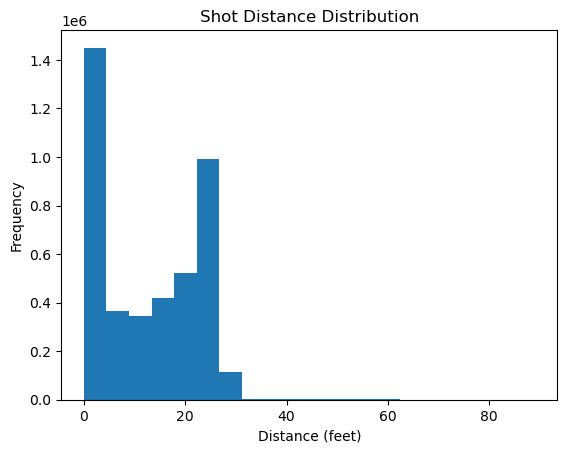

In [28]:
plt.figure()
shots_df['SHOT_DISTANCE'].plot(kind='hist', bins=20)
plt.title('Shot Distance Distribution')
plt.xlabel('Distance (feet)')
plt.ylabel('Frequency')
plt.show()

In [29]:
#To get more definitive stats
shot_distance_mean = shots_df['SHOT_DISTANCE'].mean()
shot_distance_median = shots_df['SHOT_DISTANCE'].median()
shot_distance_std = shots_df['SHOT_DISTANCE'].std()
shot_distance_min = shots_df['SHOT_DISTANCE'].min()
shot_distance_max = shots_df['SHOT_DISTANCE'].max()

print(f"Mean Shot Distance: {shot_distance_mean}")
print(f"Median Shot Distance: {shot_distance_median}")
print(f"Standard Deviation of Shot Distance: {shot_distance_std}")
print(f"Minimum Shot Distance: {shot_distance_min}")
print(f"Maximum Shot Distance: {shot_distance_max}")

Mean Shot Distance: 12.561171820605768
Median Shot Distance: 13.0
Standard Deviation of Shot Distance: 10.123746327649515
Minimum Shot Distance: 0
Maximum Shot Distance: 89


**Analysis:** It would appear that the histogram reveals a high frequency of shots at shorter distances, with a significant drop as the distance increases. Which is to be expected, that players will take and make the closer shots like layups and fewer shots from longer distances.

Success Rate by Quarter: By taking the percentage of made shots across each quarter, to see variations within shooting performance, to see if they either fatigue or end up having clutch performance.

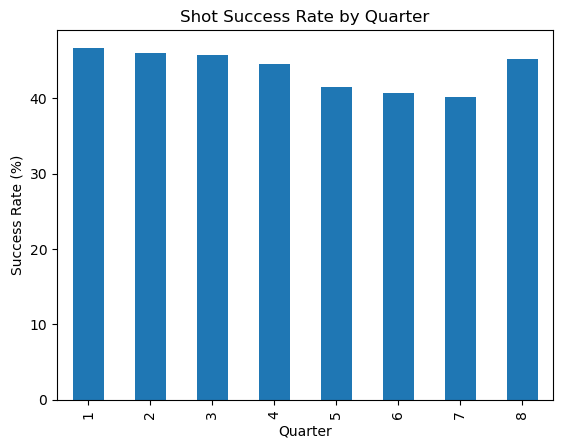

In [30]:
quarter_success_rate = shots_df.groupby('QUARTER')['SHOT_MADE'].mean() * 100
plt.figure()
quarter_success_rate.plot(kind='bar')
plt.title('Shot Success Rate by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Success Rate (%)')
plt.show()

In [31]:
# Summary Statistics for this graph
quarter_success_rate = shots_df.groupby('QUARTER')['SHOT_MADE'].mean() * 100
mean_success_rate = quarter_success_rate.mean()
std_success_rate = quarter_success_rate.std()
max_success_rate = quarter_success_rate.max()
min_success_rate = quarter_success_rate.min()

print(f"Mean Success Rate: {mean_success_rate}%")
print(f"Standard Deviation of Success Rate: {std_success_rate}%")
print(f"Highest Success Rate: {max_success_rate}%")
print(f"Lowest Success Rate: {min_success_rate}%")

Mean Success Rate: 43.84611734372335%
Standard Deviation of Success Rate: 2.6000260987341552%
Highest Success Rate: 46.71568583007698%
Lowest Success Rate: 40.21543985637343%


**Analysis:**  It would appear that the shot success rate by quarter shows a moderate consistency across quarters, with an average success rate of around 43.85%. However, there is a small fluctuation, as reflected by the standard deviation of 2.60%. We can point out that the highest success rate was in the 1st quarter, at 46.72%, suggesting that the players may start the game with better energy and accuracy.

### Question 1: Can we predict whether a player will make or miss a clutch shot based on the shot location and amount time left in the 4th quarter?

Features:
Shot location (`LOC_X`, `LOC_Y`)
Shot distance (`SHOT_DISTANCE`)
Time left in the quarter (`MINS_LEFT`, `SECS_LEFT`)
Quarter of the game (`QUARTER`)
Player data (`PLAYER_ID`, `POSITION`)
Team data (`TEAM_ID`)

I would use a classification model (Logistic Regression for interpretability, or Random Forest for capturing complex interactions) to analyze the relationship between shot attributes and outcomes in clutch situations, defined as shots taken in the last few minutes of close games.

**Initial Start to Model:** I would initally filter for clutch situations, for this instance, just in the 4th quarter with less than 2 minutes left. I struggled to figure out what is the true example of a clutch shot, but within the last quarter with two minutes left seem to be the correct way. As I typed this out, it may be a headache, but I could also include a dataset where it includes who won these games and the score, that way I could get even more definitive on a clutch shot.

### Question 2: Is there a statistically significant relationship between shot distance and shot success rate?
This one may not be as complex as needed for the project, but still wanted to throw it out there to analyze. 
Independent Variable: Shot distance (`SHOT_DISTANCE`)

Dependent Variable: Shot success

This one would use logistic regression to examine the likelihood of making a shot as a function of distance, while controlling for additional factors like `PLAYER_ID` and shot context (`QUARTER`, `SECS_LEFT`). This model would help quantify how shot success probability changes with distance, potentially identifying optimal shooting ranges for players.

**Initial Start to Model:** As I researched this one, it could be fairly easy and done whenever I fully learn from the following module so this might not be the one to do, since I could use the `SHOT_DISTANCE` as the primary feature and `SHOT_MADE` as the target. From looking forward in Module 11 and Demo 11, it appears that I should be able to easily create a logistic regression model for this question.

I could use [Statsmodels](https://www.statsmodels.org/stable/index.html) , where it gives a much more R-like interface to linear modeling. Then I can define the feature and target, but after that it got a bit confusing on if or what constant/variable I needed and how to fully carry out and correctly display the logistic regression. 